# Instalando a biblioteca do CNPJ



In [1]:
pip install basedosdados


  Using cached pyarrow-6.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
Using cached pyarrow-6.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25.6 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires geopandas>=0.12.2, but you have geopandas 0.10.0 which is incompatible.
bigframes 1.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.16.0, but you have google-cloud-bigquery 2.30.1 which is incompatible.
bigframes 1.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.42.3 which is incompatible.
bigframes 1.22.0 requires pyarrow>=10.0.1, but you have pyarrow 6.0.0 which is incompatible.
bigquery-magic

In [2]:
pip install --upgrade pyarrow

  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.0
    Uninstalling pyarrow-6.0.0:
      Successfully uninstalled pyarrow-6.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basedosdados 1.6.11 requires pyarrow==6.0.0, but you have pyarrow 17.0.0 which is incompatible.
bigframes 1.22.0 requires geopandas>=0.12.2, but you have geopandas 0.10.0 which is incompatible.
bigframes 1.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.16.0, but you have google-cloud-bigquery 2.30.1 which is incompatible.
bigframes 1.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.42.3 which is incompatible.
bigquery-magics 0.4.0 requires google-cloud-bigquery<4

In [3]:
!pip install geopandas==0.10.0


# Importando as bibliotecas


In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from google.colab import drive
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import graphviz
from google.cloud import bigquery
import pandas as pd
import basedosdados as bd


# Pegando a base de dados de alunos do BSI

In [5]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
#data_evasao_desempenho = pd.read_excel("/content/gdrive/My Drive/EvasaoBSI.xlsx")


In [7]:
#data_cpf = pd.read_excel("/content/gdrive/My Drive/EgressosBaseUnirio.xlsx"


In [8]:
file_name = "Cr_BSI_1"
#file_name = "CrMat_1"
#file_name = "CrEngProd_1"
data_cpf = pd.read_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name+".xlsx")

In [9]:
# prompt: Substitua na coluna NOME de data_cpf substrings ' por espaço

data_cpf['NOME_PESSOA'] = data_cpf['NOME_PESSOA'].str.replace("'", " ")


# Tratando o CPF

In [10]:
'''
# No valor de data_cpf['CPF_TRATADO'] que tiver 10 caracteres, adicione um 0 na frente.
data_cpf['CPF'] = data_cpf['CPF'].astype(str)
for i in range(10, 0, -1):
    data_cpf['CPF'] = np.where(data_cpf['CPF'].str.len() == i, '0' * (11 - i) + data_cpf['CPF'], data_cpf['CPF'])
'''

"\n# No valor de data_cpf['CPF_TRATADO'] que tiver 10 caracteres, adicione um 0 na frente.\ndata_cpf['CPF'] = data_cpf['CPF'].astype(str)\nfor i in range(10, 0, -1):\n    data_cpf['CPF'] = np.where(data_cpf['CPF'].str.len() == i, '0' * (11 - i) + data_cpf['CPF'], data_cpf['CPF'])\n"

In [11]:
# Crie uma nova coluna em data_cpf chamada  CPF_TRATADO, que é formada do seguinte modo: substitua os três primeiros algoritmos por * e substitua os dois últimos algoritmos por * também. Por exemplo: 12345678911 vira ***456789**
'''
data_cpf['CPF_TRATADO'] = data_cpf['CPF'].astype(str).str.replace(r'(\d{3})(\d{3})(\d{3})(\d{2})', r'***\2\3**')
'''

"\ndata_cpf['CPF_TRATADO'] = data_cpf['CPF'].astype(str).str.replace(r'(\\d{3})(\\d{3})(\\d{3})(\\d{2})', r'***\x02\x03**')\n"

In [12]:

data_cpf['CPF_TRATADO']

,CPF_TRATADO
0,***398607**
1,***398607**
2,***398607**
3,***398607**
4,***398607**
...,...
12981,***177236**
12982,***177236**
12983,***177236**
12984,***177236**


# Descobrindo os egressos que são donos de empresas

In [13]:
# Cria uma lista com os nomes únicos
nomes = data_cpf['NOME_PESSOA'].unique().tolist()
cpfs = data_cpf['CPF_TRATADO'].unique().tolist()

# Cria uma string para a cláusula WHERE com os nomes
nomes_sql = "', '".join(nomes)
cpfs_sql = "', '".join(cpfs )

# Cria o cliente BigQuery
client = bigquery.Client(project='dissertacao-416315')

# Define a consulta com a cláusula WHERE para filtrar pelos nomes
query = f"""
SELECT * FROM `basedosdados.br_me_cnpj.socios`
WHERE nome IN ('{nomes_sql}') and documento in ('{cpfs_sql}')
"""

# Executa a consulta e escreve o resultado em um DataFrame
df_socios = pd.read_gbq(query, project_id='dissertacao-416315', reauth=True)

In [14]:
'''
nomes = data_cpf['NOME_PESSOA'].unique().tolist()
cpfs = data_cpf['CPF_TRATADO'].unique().tolist()

client = bigquery.Client(project='dissertacao-416315')

# Defina a consulta
query = """
SELECT * FROM `basedosdados.br_me_cnpj.Simples` x join `basedosdados.br_me_cnpj.socios` y on (x.cnpj_basico = y.cnpj_basico and  y.nome IN ('{nomes_sql}') and y.documento in ('{cpfs_sql}' ))
"""

# Execute a consulta e escreva o resultado em um DataFrame
df_meis = pd.read_gbq(query, project_id='dissertacao-416315', reauth=True)
'''

'\nnomes = data_cpf[\'NOME_PESSOA\'].unique().tolist()\ncpfs = data_cpf[\'CPF_TRATADO\'].unique().tolist()\n\nclient = bigquery.Client(project=\'dissertacao-416315\')\n\n# Defina a consulta\nquery = """\nSELECT * FROM `basedosdados.br_me_cnpj.Simples` x join `basedosdados.br_me_cnpj.socios` y on (x.cnpj_basico = y.cnpj_basico and  y.nome IN (\'{nomes_sql}\') and y.documento in (\'{cpfs_sql}\' ))\n"""\n\n# Execute a consulta e escreva o resultado em um DataFrame\ndf_meis = pd.read_gbq(query, project_id=\'dissertacao-416315\', reauth=True)\n'

In [15]:
# prompt: Crie uma nova coluna em df_socios chamada 'mei' onde houver intersecção de 'nome' de df_socios com 'nome' com df_meis
'''
df_socios['mei'] = df_socios['nome'].isin(df_meis['nome']).astype(int)
df_socios
'''

"\ndf_socios['mei'] = df_socios['nome'].isin(df_meis['nome']).astype(int)\ndf_socios\n"

In [16]:
# prompt: Pegue valores únicos de df_socios pelo nome

df_socios_unicos = df_socios.drop_duplicates(subset='nome')
#df_socios_unicos

In [17]:
# prompt: Crie uma nova coluna em data_cpf chamada "Empresario". Preencha essa coluna com 1 caso data_cpf.NOME = df_socios_unicos.nome e data_cpf.CPF_TRATADO = df_socios_unicos.documento, caso o contrário, preencha com 0.

data_cpf['Empresario'] = np.where((data_cpf['NOME_PESSOA'].isin(df_socios_unicos['nome'])) & (data_cpf['CPF_TRATADO'].isin(df_socios_unicos['documento'])), 1, 0)
data_cpf['IsTheyBusinessperson'] = np.where((data_cpf['NOME_PESSOA'].isin(df_socios_unicos['nome'])) & (data_cpf['CPF_TRATADO'].isin(df_socios_unicos['documento'])), 'Entrepreneur', 'Nonentrepreneur')


In [18]:
#data_cpf

In [19]:
# prompt: Liste os valores das colunas de data_cpf cujo Empresario = 1.

#data_cpf[data_cpf['Empresario'] == 1]


In [20]:
# prompt: Liste os valores das colunas de data_cpf cujo Empresario = 1 e CURSO = "Sistemas de Informação - Bacharelado - Turno Integral (V/N)"

#data_cpf[(data_cpf['Empresario'] == 1) & (data_cpf['NOME_CURSO'] == "Sistemas de Informação - Bacharelado - Turno Integral (V/N)")]


<Axes: xlabel='NOME_CURSO'>

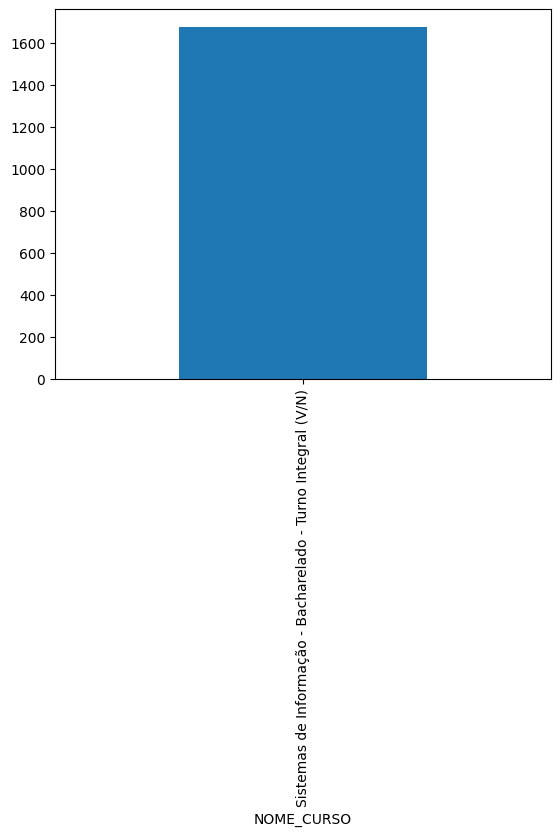

In [21]:
# prompt: Faça um histograma dos 10 CURSO que tem mais empresários = 1

data_cpf.groupby('NOME_CURSO')['Empresario'].sum().nlargest(10).plot(kind='bar')


# Trabalhando com as datas de evasão e entrada na sociedade

In [22]:
data_cpf['DT_EVASAO']

,DT_EVASAO
0,2018-10-05
1,2015-10-27
2,2018-10-05
3,2015-10-27
4,2018-10-05
...,...
12981,2023-07-30
12982,2023-07-30
12983,2023-07-30
12984,2023-07-30


In [23]:
# prompt: Junte df_socios com data_cpf onde df_socios.nome = data_cpf.NOME e df_socios.documento =  data_cpf.CPF_TRATADO

df_merged = pd.merge(df_socios_unicos, data_cpf, left_on=['nome', 'documento'], right_on=['NOME_PESSOA', 'CPF_TRATADO'])


In [24]:
df_merged

,data,cnpj_basico,tipo,nome,documento,qualificacao,data_entrada_sociedade,id_pais,cpf_representante_legal,nome_representante_legal,...,grade_basic_math,grade_calculus1,grade_linear_algebra,grade_logic,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson
0,2023-02-15,46207735,2,RICARDO AUGUSTO BLEI SANT ANNA DAS NEVES,***361867**,49,2022-04-29,None,None,None,...,10,7.4,9.5,4.1,Concluido,***361867**,5636186711,2019-04-11,1,Entrepreneur
1,2023-02-15,46207735,2,RICARDO AUGUSTO BLEI SANT ANNA DAS NEVES,***361867**,49,2022-04-29,None,None,None,...,10,7.4,9.5,4.1,Concluido,***361867**,5636186711,2019-04-11,1,Entrepreneur
2,2023-02-15,46207735,2,RICARDO AUGUSTO BLEI SANT ANNA DAS NEVES,***361867**,49,2022-04-29,None,None,None,...,10,7.4,9.5,4.1,Concluido,***361867**,5636186711,2019-04-11,1,Entrepreneur
3,2023-02-15,46207735,2,RICARDO AUGUSTO BLEI SANT ANNA DAS NEVES,***361867**,49,2022-04-29,None,None,None,...,10,7.4,9.5,4.1,Concluido,***361867**,5636186711,2019-04-11,1,Entrepreneur
4,2023-02-15,46207735,2,RICARDO AUGUSTO BLEI SANT ANNA DAS NEVES,***361867**,49,2022-04-29,None,None,None,...,10,7.4,9.5,4.1,Concluido,***361867**,5636186711,2019-04-11,1,Entrepreneur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2024-03-15,54046961,2,GUILHERME AUGUSTO SILVA MOREIRA,***066245**,22,2024-02-23,None,None,None,...,10,7.4,9.5,4.1,Evadido,***066245**,85806624510,2023-11-21,1,Entrepreneur
1674,2024-03-15,54046961,2,GUILHERME AUGUSTO SILVA MOREIRA,***066245**,22,2024-02-23,None,None,None,...,10,7.4,9.5,4.1,Evadido,***066245**,85806624510,2023-11-21,1,Entrepreneur
1675,2024-03-15,54046961,2,GUILHERME AUGUSTO SILVA MOREIRA,***066245**,22,2024-02-23,None,None,None,...,10,7.4,9.5,4.1,Evadido,***066245**,85806624510,2023-11-21,1,Entrepreneur
1676,2024-03-15,54046961,2,GUILHERME AUGUSTO SILVA MOREIRA,***066245**,22,2024-02-23,None,None,None,...,10,7.4,9.5,4.1,Evadido,***066245**,85806624510,2023-11-21,1,Entrepreneur


In [25]:
df_merged['data_entrada_sociedade']

,data_entrada_sociedade
0,2022-04-29
1,2022-04-29
2,2022-04-29
3,2022-04-29
4,2022-04-29
...,...
1673,2024-02-23
1674,2024-02-23
1675,2024-02-23
1676,2024-02-23


In [26]:
df_merged['DT_EVASAO']

,DT_EVASAO
0,2019-04-11
1,2019-04-11
2,2019-04-11
3,2019-04-11
4,2019-04-11
...,...
1673,2023-11-21
1674,2023-11-21
1675,2023-11-21
1676,2023-11-21


In [27]:
# prompt: Converta df_merged['data_entrada_sociedade'] para datetime64[ns]

df_merged['data_entrada_sociedade'] = pd.to_datetime(df_merged['data_entrada_sociedade'], errors='coerce', format='%Y-%m-%d')
df_merged['DT_EVASAO'] = pd.to_datetime(df_merged['DT_EVASAO'], errors='coerce', format='%Y-%m-%d')
df_merged['year4'] = pd.to_datetime(df_merged['year4'], errors='coerce', format='%Y-%m-%d')

In [28]:
# df_merged['DT_EVASAO']

In [29]:
# df_merged['data_entrada_sociedade']

In [30]:
# prompt: Crie uma nova coluna em df_merged chamada Tempo_Evasao_Sociedade, que é a diferença de tempo entre DT_EVASAO e data_entrada_sociedade

df_merged['Tempo_Evasao_Sociedade'] = df_merged['DT_EVASAO'] - df_merged['data_entrada_sociedade']
df_merged['Tempo_Evasao_Sociedade']

,Tempo_Evasao_Sociedade
0,-1114 days
1,-1114 days
2,-1114 days
3,-1114 days
4,-1114 days
...,...
1673,-94 days
1674,-94 days
1675,-94 days
1676,-94 days


In [31]:
#df_merged['Tempo_Evasao_Sociedade'] = df_merged['year4'] - df_merged['data_entrada_sociedade']
#df_merged['Tempo_Evasao_Sociedade']

In [32]:
# prompt: Converta df_merged['ANO_INGRESSO'] ] para DatetimeArray

df_merged['ANO_INGRESSO'] = pd.to_datetime(df_merged['ANO_INGRESSO'], format='%Y')


In [33]:
df_merged['Tempo_Universidade_Sociedade'] = df_merged['ANO_INGRESSO']  - df_merged['data_entrada_sociedade']
df_merged['Tempo_Universidade_Sociedade']

,Tempo_Universidade_Sociedade
0,-3040 days
1,-3040 days
2,-3040 days
3,-3040 days
4,-3040 days
...,...
1673,-1148 days
1674,-1148 days
1675,-1148 days
1676,-1148 days


<Axes: xlabel='Tempo_Evasao_Sociedade_Cat'>

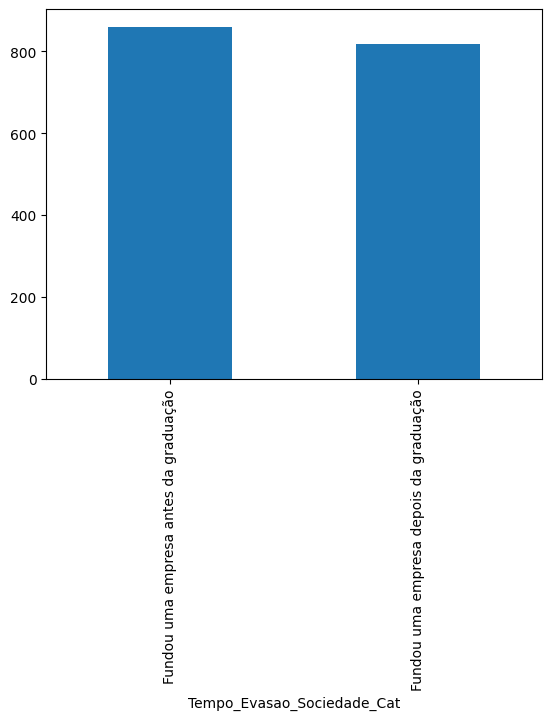

In [34]:
# prompt: Faça um gráfico de barras de df_merged['Tempo_Evasao_Sociedade'] para duas categoria: valores menores que 0 e valores maiores que 0.

df_merged['Tempo_Evasao_Sociedade_Cat'] = np.where(df_merged['Tempo_Evasao_Sociedade'] < pd.Timedelta(0), 'Fundou uma empresa depois da graduação' ,'Fundou uma empresa antes da graduação')

df_merged.groupby('Tempo_Evasao_Sociedade_Cat')['Tempo_Evasao_Sociedade'].count().plot(kind='bar')


<Axes: xlabel='Tempo_Universidade_Sociedade_Cat'>

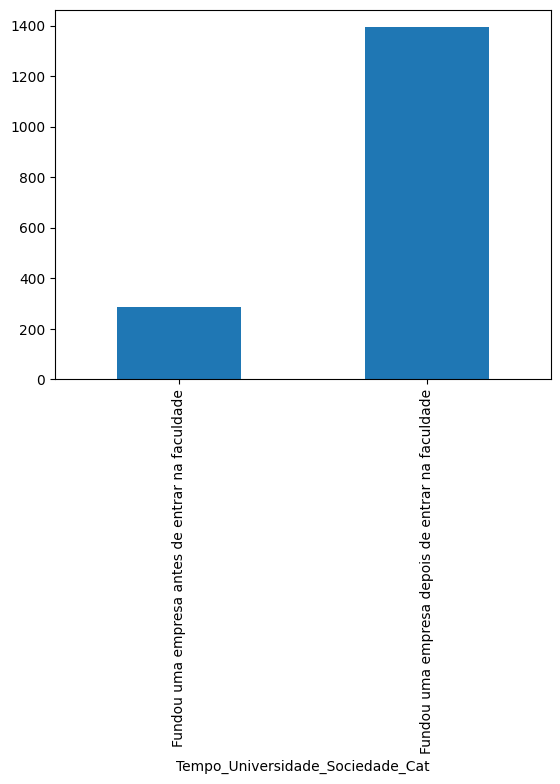

In [35]:
df_merged['Tempo_Universidade_Sociedade_Cat'] = np.where(df_merged['Tempo_Universidade_Sociedade'] < pd.Timedelta(0),'Fundou uma empresa depois de entrar na faculdade' , 'Fundou uma empresa antes de entrar na faculdade')

df_merged.groupby('Tempo_Universidade_Sociedade_Cat')['Tempo_Universidade_Sociedade'].count().plot(kind='bar')

In [36]:
# prompt: Coloque a tabela df_merged['Tempo_Evasao_Sociedade_Cat'] em data_cpf onde df_socios.nome = data_cpf.NOME e df_socios.documento =  data_cpf.CPF_TRATADO

data_cpf = data_cpf.merge(df_merged[['Tempo_Evasao_Sociedade_Cat']], left_on=['NOME_PESSOA', 'CPF_TRATADO'], right_on=[df_merged['nome'],df_merged['documento'] ], how='left')
data_cpf['Tempo_Evasao_Sociedade_Cat'].fillna('Não é empresário', inplace=True)
# data_cpf

In [37]:
data_cpf = data_cpf.merge(df_merged[['Tempo_Universidade_Sociedade_Cat']], left_on=['NOME_PESSOA', 'CPF_TRATADO'], right_on=[df_merged['nome'],df_merged['documento'] ], how='left')
data_cpf['Tempo_Universidade_Sociedade_Cat'].fillna('Não é empresário', inplace=True)

# Consolidação para o modelo

In [38]:
#data_cpf

In [39]:
# data_cpf.to_excel("/content/gdrive/My Drive/dados_mestrado/data_cpf_modelo.xlsx")

In [40]:
#data_cpf[data_cpf['Empresario'] == 1]


In [41]:
def definir_categoria(row):
    if row['Tempo_Evasao_Sociedade_Cat'] == 'Não é empresário' and row['Tempo_Universidade_Sociedade_Cat'] == 'Não é empresário':
        return 'Não é empresário'
    elif row['Tempo_Evasao_Sociedade_Cat'] == 'Fundou uma empresa antes da graduação' and row['Tempo_Universidade_Sociedade_Cat'] == 'Fundou uma empresa depois de entrar na faculdade':
        return 'Fundou uma empresa durante a graduação'
    elif row['Tempo_Evasao_Sociedade_Cat'] == 'Fundou uma empresa depois da graduação':
        return 'Fundou uma empresa depois da graduação'
    elif row['Tempo_Universidade_Sociedade_Cat'] == 'Fundou uma empresa antes de entrar na faculdade':
        return 'Fundou uma empresa antes de entrar na graduação'
    else:
        return 'Categoria Não Definida'  # Para qualquer caso que não se encaixe nas condições acima


# Aplicar a função para criar a nova coluna
data_cpf['Categoria'] = data_cpf.apply(definir_categoria, axis=1)


<Axes: >

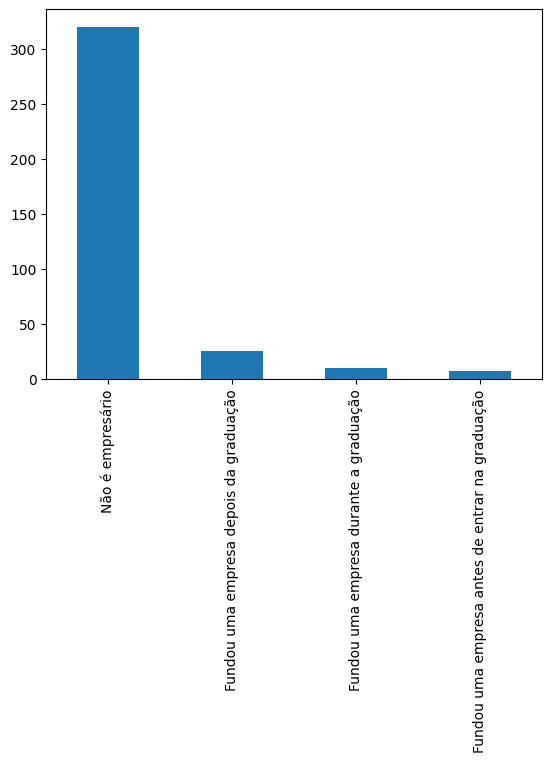

In [42]:
# prompt: Faça de um gráfico de barras de Tempo_Evasao_Sociedade_Cat de data_cpf
data_cpf_unicos = data_cpf.drop_duplicates(subset='NOME_PESSOA')

data_cpf_unicos['Categoria'].value_counts().plot(kind='bar')


In [43]:
data_cpf_unicos[data_cpf_unicos['Empresario'] == 1]

,Unnamed: 0,MATR_ALUNO,renda,NOME_PESSOA,ANO_EVASAO,ingresso_atual,NOME_CURSO,NOME_ATIV_CURRIC,MEDIA_FINAL,SEXO,...,grade_logic,FORMA_EVASAO,CPF_TRATADO,CPF_MASCARA,DT_EVASAO,Empresario,IsTheyBusinessperson,Tempo_Evasao_Sociedade_Cat,Tempo_Universidade_Sociedade_Cat,Categoria
0,0,20131210001,não-baixa-renda,DANTON COELHO,2015.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,ADMINISTRAÇÃO FINANCEIRA,10.00,M,...,4.1,Evadido,***398607**,8839860789,2018-10-05,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1061631,525,20131210011,não-baixa-renda,LEONARDO BETZLER RODRIGUES,2013.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,M,...,4.1,Evadido,***857587**,14685758722,2013-10-21,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1062191,875,20131210025,não-baixa-renda,AMANDA CRISTINA RODRIGUES FERREIRA,2016.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,ANÁLISE DE SISTEMAS,8.90,M,...,4.1,Concluido,***139757**,11013975782,2016-08-29,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1220682,1956,20132210010,não-baixa-renda,YURI TATSCH GUIA,2015.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,M,...,4.1,Evadido,***549287**,13654928773,2015-02-03,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1378232,2096,20132210013,não-baixa-renda,GETULIO PEREIRA DE VASCONCELLOS FILHO,2023.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,9.50,M,...,4.1,Evadido,***941947**,12994194708,2023-06-23,1,Entrepreneur,Fundou uma empresa antes da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa durante a graduação
1527109,2149,20132210014,não-baixa-renda,THIAGO PISANI,2014.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,0.00,M,...,4.1,Evadido,***153527**,14615352719,2014-10-07,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1528875,3195,20132210033,não-baixa-renda,YURI LOGATTO PAMPLONA,2017.0,cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,9.00,M,...,4.1,Concluido,***862837**,12686283793,2018-03-23,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1778922,3258,20132210035,não-baixa-renda,SERGIO RICARDO AMARAL GOMES,2017.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,8.50,M,...,4.1,Evadido,***973317**,14797331720,2017-06-12,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1780990,3610,20141210009,não-baixa-renda,BIANCA RODRIGUES TEIXEIRA,2017.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,9.00,F,...,4.1,Concluido,***020377**,16602037757,2018-03-23,1,Entrepreneur,Fundou uma empresa depois da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa depois da graduação
1913664,3684,20141210011,não-baixa-renda,TITO VIEIRA DE REZENDE NETO,2022.0,nao-cotistas,Sistemas de Informação - Bacharelado - Turno I...,DESENVOLVIMENTO DE PÁGINAS WEB,9.00,M,...,4.1,Evadido,***083887**,16508388754,2022-11-29,1,Entrepreneur,Fundou uma empresa antes da graduação,Fundou uma empresa depois de entrar na faculdade,Fundou uma empresa durante a graduação


In [44]:
data_iguais = data_cpf[data_cpf['ANO'] == data_cpf['ANO_INGRESSO']]
data_unicos = data_iguais.drop_duplicates(subset='NOME_PESSOA')


file_name = file_name+"_2.xlsx"
data_cpf_unicos.to_excel("/content/gdrive/My Drive/dados_mestrado/"+file_name)

In [45]:
file_name = file_name+"_2.xlsx"
data_cpf_unicos.to_csv("/content/gdrive/My Drive/dados_mestrado/"+file_name)

In [46]:
# Reduce the number of columns by dropping unnecessary columns
#data_cpf_reduced = data_cpf.drop(columns=['Tempo_Evasao_Sociedade_Cat', 'Tempo_Universidade_Sociedade_Cat', 'NOME_CURSO', 'CPF_TRATADO', 'NOME_PESSOA', 'DT_EVASAO', 'FORMA_EVASAO'])

# Save the reduced DataFrame to Excel
#data_cpf_reduced.to_excel("/content/gdrive/My Drive/dados_mestrado/data_cpf_modelo_bsi_notas.xlsx")

In [47]:
'''
data_bsi = data_cpf[(data_cpf['Empresario'] == 1) & (data_cpf['NOME_CURSO'] == "Sistemas de Informação - Bacharelado - Turno Integral (V/N)")]

# Cria uma lista com os nomes únicos
nomes_bsi = data_bsi['NOME_PESSOA'].unique().tolist()
cpfs_bsi = data_bsi['CPF_TRATADO'].unique().tolist()

# Cria uma string para a cláusula WHERE com os nomes
nomes_sql_bsi = "', '".join(nomes_bsi)
cpfs_sql_bsi = "', '".join(cpfs_bsi)

# Crie um cliente BigQuery
client = bigquery.Client(project='dissertacao-416315')

# Defina a consulta
query = f"""
SELECT * FROM `basedosdados.br_me_cnpj.empresas` x
join `basedosdados.br_me_cnpj.socios` y on (x.cnpj_basico = y.cnpj_basico
and y.nome in ('{nomes_sql_bsi}') and documento in ('{cpfs_sql_bsi}')) LIMIT 1000
"""
# Execute a consulta e escreva o resultado em um DataFrame
df_donos_bsi = pd.read_gbq(query, project_id='dissertacao-416315', reauth=True)
'''

'\ndata_bsi = data_cpf[(data_cpf[\'Empresario\'] == 1) & (data_cpf[\'NOME_CURSO\'] == "Sistemas de Informação - Bacharelado - Turno Integral (V/N)")]\n\n# Cria uma lista com os nomes únicos\nnomes_bsi = data_bsi[\'NOME_PESSOA\'].unique().tolist()\ncpfs_bsi = data_bsi[\'CPF_TRATADO\'].unique().tolist()\n\n# Cria uma string para a cláusula WHERE com os nomes\nnomes_sql_bsi = "\', \'".join(nomes_bsi)\ncpfs_sql_bsi = "\', \'".join(cpfs_bsi)\n\n# Crie um cliente BigQuery\nclient = bigquery.Client(project=\'dissertacao-416315\')\n\n# Defina a consulta\nquery = f"""\nSELECT * FROM `basedosdados.br_me_cnpj.empresas` x\njoin `basedosdados.br_me_cnpj.socios` y on (x.cnpj_basico = y.cnpj_basico\nand y.nome in (\'{nomes_sql_bsi}\') and documento in (\'{cpfs_sql_bsi}\')) LIMIT 1000\n"""\n# Execute a consulta e escreva o resultado em um DataFrame\ndf_donos_bsi = pd.read_gbq(query, project_id=\'dissertacao-416315\', reauth=True)\n'

In [48]:
# df_donos_bsi = df_donos_bsi.drop_duplicates(subset='nome')
# df_donos_bsi

In [49]:
# prompt: Crie um dataset chamado de empresarios_bsi juntado df_donos_bsi.nome com data_cpf.NOME  e df_donos_bsi.documento com data_cpf.CPF_TRATADO. Pegue as somente essas colunas e df_donos_bsi.razao_social e data_cpf.Tempo_Evasao_Sociedade_Cat

# empresarios_bsi = pd.merge(df_donos_bsi[['nome', 'documento', 'razao_social']], data_cpf[['NOME_PESSOA', 'CPF_TRATADO', 'Tempo_Evasao_Sociedade_Cat']], left_on=['nome', 'documento'], right_on=['NOME_PESSOA', 'CPF_TRATADO'])[['nome', 'documento', 'razao_social', 'Tempo_Evasao_Sociedade_Cat']]
# empresarios_bsi

In [50]:
# prompt: Pegue empresarios_bsi por nome único

# empresarios_bsi_unicos = empresarios_bsi.drop_duplicates(subset='nome')
# empresarios_bsi_unicos

# Modelo para prever desempenho acadêmico

In [51]:
data_modelo = data_cpf[['ingresso_atual', 'MEDIA_FINAL', 'CR_ATUAL', 'CR_NO_PERIODO', 'Empresario', 'Categoria']]


In [52]:
# Transformar as colunas de data modelo que são categóricas, como ingresso_atual, FORMA_EVASAO e Tempo_Evasao_Sociedade_Cat, em colunas numéricas
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply the label encoder to the categorical columns
data_modelo['ingresso_atual'] = le.fit_transform(data_modelo['ingresso_atual'])
data_modelo['Categoria'] = le.fit_transform(data_modelo['Categoria'])

<Axes: xlabel='Empresario'>

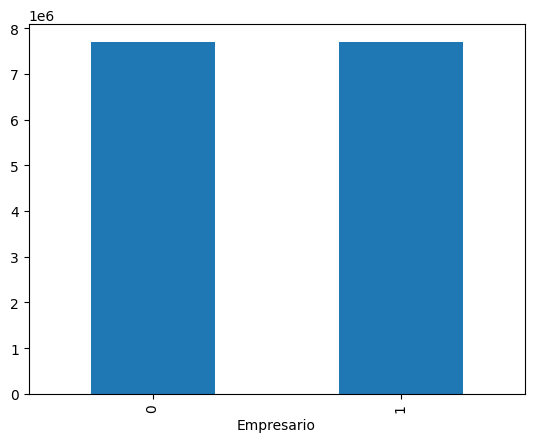

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(data_modelo.drop("Empresario", axis=1), data_modelo["Empresario"])

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=data_modelo.drop("Empresario", axis=1).columns), pd.DataFrame(y_resampled, columns=["Empresario"])], axis=1)

data_resampled.groupby("Empresario").size().plot(kind="bar")

In [54]:
'''
# Define the dependent and independent variables
dependent_variable = data_modelo["CR_ATUAL"]
independent_vars = data_modelo[["ingresso_atual", "MEDIA_FINAL", "CR_NO_PERIODO", "Empresario", "Categoria"]]
'''


'\n# Define the dependent and independent variables\ndependent_variable = data_modelo["CR_ATUAL"]\nindependent_vars = data_modelo[["ingresso_atual", "MEDIA_FINAL", "CR_NO_PERIODO", "Empresario", "Categoria"]]\n'

In [55]:
'''
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(independent_vars, dependent_variable)

# Coeficientes da regressão linear
coefficients = model.coef_

# Calcular o valor agregado das variáveis independentes
aggregated_value = np.dot(independent_vars, coefficients)

# Prever os valores da variável dependente usando o modelo ajustado
predicted_values = model.predict(independent_vars)

# Criar o scatterplot
plt.scatter(aggregated_value, dependent_variable, label='Real Data')

# Plotar a linha de regressão
# Note que usamos `aggregated_value` para criar a linha, mas poderíamos também usar as variáveis independentes diretamente
plt.plot(aggregated_value, predicted_values, color='red', label='Regression Line')

# Adicionar rótulos e título
plt.xlabel('Independent features: Agregated Value of admission method, final grade on each discipline, semester GPA, IsTheyBusinessperson, Category of businessperson student')
plt.ylabel('Dependent feature: Accumulated GPA')
plt.title('Scatter Plot of Dependent Variable and Added Value of Independent Variables with Regression Line')
plt.legend()

# Mostrar o gráfico
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import LinearRegression\n\nmodel = LinearRegression()\nmodel.fit(independent_vars, dependent_variable)\n\n# Coeficientes da regressão linear\ncoefficients = model.coef_\n\n# Calcular o valor agregado das variáveis independentes\naggregated_value = np.dot(independent_vars, coefficients)\n\n# Prever os valores da variável dependente usando o modelo ajustado\npredicted_values = model.predict(independent_vars)\n\n# Criar o scatterplot\nplt.scatter(aggregated_value, dependent_variable, label='Real Data')\n\n# Plotar a linha de regressão\n# Note que usamos `aggregated_value` para criar a linha, mas poderíamos também usar as variáveis independentes diretamente\nplt.plot(aggregated_value, predicted_values, color='red', label='Regression Line')\n\n# Adicionar rótulos e título\nplt.xlabel('Independent features: Agregated Value of admission method, final grade on each discipline, semester GPA, IsTheyBusinessperson, Category of business

In [56]:
'''
r_squared = model.score(independent_vars, dependent_variable)
print(f'R^2 value: {r_squared}')
'''

"\nr_squared = model.score(independent_vars, dependent_variable)\nprint(f'R^2 value: {r_squared}')\n"

In [57]:
'''
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, independent_vars, dependent_variable, cv=5, scoring='r2')
print(f'Scores de validação cruzada: {cv_scores}')
print(f'Média dos scores de validação cruzada: {cv_scores.mean()}')
'''

"\nfrom sklearn.model_selection import cross_val_score\n\ncv_scores = cross_val_score(model, independent_vars, dependent_variable, cv=5, scoring='r2')\nprint(f'Scores de validação cruzada: {cv_scores}')\nprint(f'Média dos scores de validação cruzada: {cv_scores.mean()}')\n"